In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from matplotlib.colors import LogNorm, SymLogNorm

from itertools import chain

import pycharge as pc
from tqdm import tqdm

# Stationary charge

In [2]:
# Create charge and simulation objects
source = pc.StationaryCharge(position=(0, 0, 0))
simulation = pc.Simulation(source)

# Create meshgrid in x-y plane between -10 nm to 10 nm at z=0
lim = 10e-9
npoints = 1000  # Number of grid points
coordinates = np.linspace(-lim, lim, npoints)  # grid from -lim to lim
x, y, z = np.meshgrid(coordinates, coordinates, 0, indexing='ij')  # z=0

# Calculate E field components at t=0
E_x, E_y, E_z = simulation.calculate_E(t=0, x=x, y=y, z=z)

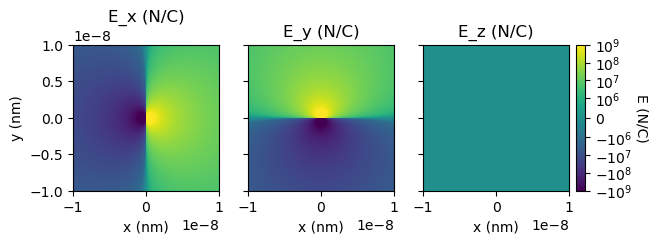

In [3]:
# Plot E_x, E_y, and E_z fields
E_x_plane = E_x[:, :, 0]  # Create 2D array at z=0 for plotting
E_y_plane = E_y[:, :, 0]
E_z_plane = E_z[:, :, 0]

# Create figs and axes, plot E components on log scale
fig, axs = plt.subplots(1, 3, sharey=True)
norm = mpl.colors.SymLogNorm(linthresh=1.01e6, linscale=1, vmin=-1e9, vmax=1e9)
extent = [-lim, lim, -lim, lim]
im_0 = axs[0].imshow(E_x_plane.T, origin='lower', norm=norm, extent=extent)
im_1 = axs[1].imshow(E_y_plane.T, origin='lower', norm=norm, extent=extent)
im_2 = axs[2].imshow(E_z_plane.T, origin='lower', norm=norm, extent=extent)

# Add labels
for ax in axs:
    ax.set_xlabel('x (nm)')
axs[0].set_ylabel('y (nm)')
axs[0].set_title('E_x (N/C)')
axs[1].set_title('E_y (N/C)')
axs[2].set_title('E_z (N/C)')

# Add colorbar to figure
Ecax = inset_axes(
    axs[2], width="6%", height="100%", loc='lower left',
    bbox_to_anchor=(1.05, 0., 1, 1), bbox_transform=axs[2].transAxes, borderpad=0
)
E_cbar = plt.colorbar(im_2, cax=Ecax)  # right of im_2
E_cbar.ax.set_ylabel('E (N/C)', rotation=270, labelpad=12)

plt.show()


# Oscillating dipole

In [4]:
# Create charge and simulation objects
charge = pc.OscillatingCharge(origin=(0, 0, 0), direction=(1, 0, 0),
                              amplitude=1e-10, omega=5e17)
simulation = pc.Simulation(charge)

In [5]:
# Create meshgrid in x-y plane between -10 nm to 10 nm at z=0
lim = 10e-9
npoints = 1000  # Number of grid points
coordinates = np.linspace(-lim, lim, npoints)  # grid from -lim to lim
x, y, z = np.meshgrid(coordinates, coordinates, 0, indexing='ij')  # z=0

# Calculate E field components at t=0
E_x, E_y, E_z = simulation.calculate_E(t=0, x=x, y=y, z=z)

Text(0, 0.5, 'E (N/C)')

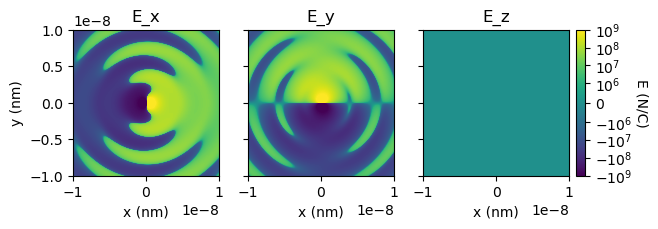

In [6]:
# Plot E_x, E_y, and E_z fields
E_x_plane = E_x[:, :, 0]  # Create 2D array at z=0 for plotting
E_y_plane = E_y[:, :, 0]
E_z_plane = E_z[:, :, 0]

# Create figs and axes, plot E components on log scale
fig, axs = plt.subplots(1, 3, sharey=True)
norm = SymLogNorm(linthresh=1.01e6, linscale=1, vmin=-1e9, vmax=1e9)
extent = [-lim, lim, -lim, lim]
im_0 = axs[0].imshow(E_x_plane.T, origin='lower', norm=norm, extent=extent)
im_1 = axs[1].imshow(E_y_plane.T, origin='lower', norm=norm, extent=extent)
im_2 = axs[2].imshow(E_z_plane.T, origin='lower', norm=norm, extent=extent)

# Add labels
for ax in axs:
    ax.set_xlabel('x (nm)')
axs[0].set_ylabel('y (nm)')
axs[0].set_title('E_x')
axs[1].set_title('E_y')
axs[2].set_title('E_z')

# Add colorbar to figure
Ecax = inset_axes(axs[2],
                  width="6%",  # width = 5% of parent_bbox width
                  height="100%",  # height : 50%
                  loc='lower left',
                  bbox_to_anchor=(1.05, 0., 1, 1),
                  bbox_transform=axs[2].transAxes,
                  borderpad=0,
                  )
E_cbar = plt.colorbar(im_2, cax=Ecax)  # right of im_2
E_cbar.ax.set_ylabel('E (N/C)', rotation=270, labelpad=12)


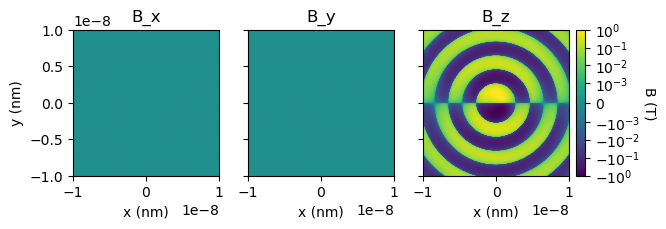

In [7]:
# Calculate B field components at t=0
B_x, B_y, B_z = simulation.calculate_B(t=0, x=x, y=y, z=z)

# Plot E_x, E_y, and E_z fields
B_x_plane = B_x[:, :, 0]  # Create 2D array at z=0 for plotting
B_y_plane = B_y[:, :, 0]
B_z_plane = B_z[:, :, 0]

# Create figs and axes, plot E components on log scale
fig, axs = plt.subplots(1, 3, sharey=True)
norm = SymLogNorm(linthresh=1.01e-3, linscale=1, vmin=-1, vmax=1)
extent = [-lim, lim, -lim, lim]
im_0 = axs[0].imshow(B_x_plane.T, origin='lower', norm=norm, extent=extent)
im_1 = axs[1].imshow(B_y_plane.T, origin='lower', norm=norm, extent=extent)
im_2 = axs[2].imshow(B_z_plane.T, origin='lower', norm=norm, extent=extent)

# Add labels
for ax in axs:
    ax.set_xlabel('x (nm)')
axs[0].set_ylabel('y (nm)')
axs[0].set_title('B_x')
axs[1].set_title('B_y')
axs[2].set_title('B_z')

# Add colorbar to figure
Ecax = inset_axes(axs[2],
                  width="6%",  # width = 5% of parent_bbox width
                  height="100%",  # height : 50%
                  loc='lower left',
                  bbox_to_anchor=(1.05, 0., 1, 1),
                  bbox_transform=axs[2].transAxes,
                  borderpad=0,
                  )
E_cbar = plt.colorbar(im_2, cax=Ecax)  # right of im_2
E_cbar.ax.set_ylabel('B (T)', rotation=270, labelpad=12)

plt.show()
# %% Calculate and plot scalar and vector potentials
# Create charge and simulation objects
charge = pc.OscillatingCharge(origin=(0, 0, 0), direction=(1, 0, 0),
                              amplitude=1e-10, omega=5e17)
simulation = pc.Simulation(charge)


# Oscillating dipole

In [8]:
from scipy.constants import e, mu_0, c

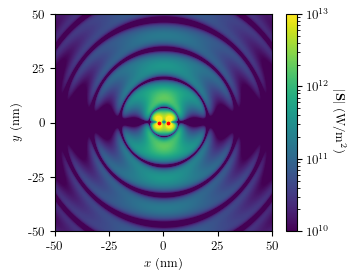

In [9]:
def latex_plot(font_size=9, width=330):
    fig_width_in = width / 72.27
    fig_height_in = fig_width_in * (5**.5-1)/2
    nice_fonts = {
        'text.usetex': True,
        'font.family': 'serif',
        'axes.labelsize': font_size,
        'font.size': font_size,
        'legend.fontsize': font_size,
        'xtick.labelsize': font_size,
        'ytick.labelsize': font_size,
        'figure.figsize': (fig_width_in, fig_height_in)
    }
    plt.style.use(nice_fonts)


latex_plot()

lim = 50e-9
grid_size = 1000
Smax = 1e13
Smin = 1e10
omega = 7e16

# Calculate and plot E and B
charges = (pc.OscillatingCharge((0, 0, 0), (1, 0, 0), 2e-9,  omega, q=e),
           pc.OscillatingCharge((0, 0, 0), (-1, 0, 0), 2e-9,  omega, q=-e))
simulation = pc.Simulation(charges)
coord = np.linspace(-lim, lim, grid_size)
x, y, z = np.meshgrid(coord, coord, 0*2*np.pi*c/omega, indexing='ij')
Ex, Ey, _ = simulation.calculate_E(0, x, y, z, 'Acceleration')
_, _, Bz = simulation.calculate_B(0, x, y, z, 'Acceleration')

Ex = Ex[:, :, 0]
Ey = Ey[:, :, 0]
Bz = Bz[:, :, 0]

Sx = Ey*Bz
Sy = -Ex*Bz
S = (Sx**2+Sy**2)**0.5/mu_0

fig, ax = plt.subplots()
ax.set_xlabel('$x$ (nm)')
ax.set_ylabel('$y$ (nm)')
ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)
im = plt.imshow(S.T, origin='lower',
                extent=[-lim, lim, -lim, lim], vmax=7)
plt.xticks([-lim, -lim/2, 0, lim/2, lim], [-50, -25, 0, 25, 50])
plt.yticks([-lim, -lim/2, 0, lim/2, lim], [-50, -25, 0, 25, 50])
im.set_norm(mpl.colors.LogNorm(vmin=Smin, vmax=Smax))

cb = fig.colorbar(im, fraction=0.046, pad=0.04)
cb.ax.set_ylabel(r'$|\mathbf{S}|$ (W/$\mathrm{m}^2$)',
                 rotation=270, labelpad=12)
ax.scatter(-2e-9, 0, s=3, c='red', marker='o')
ax.scatter(2e-9, 0, s=3, c='red', marker='o')
#plt.savefig('figure5.pdf', bbox_inches='tight', pad_inches=0.03, dpi=500)

# Dipole chain

Dipole-dipole distance 

$$ d = f \lambda = f \frac{2\pi}{k_0} = f \frac{2\pi\omega }{c} $$ 

In [173]:
omega = 7e14
f = 0.4
λ = 2*np.pi*c/omega
d = 10*λ
d/1e-9

26909.308104412186

In [184]:
nmax = 1
Ndipoles = 2*nmax
d*Ndipoles/1e-9

T0 = 2*np.pi/omega 
t=20*T0
tstop=5*T0

In [185]:
c*t/d

2.0

In [186]:
lim = 1.1*c*t+d*nmax #1000e-9
grid_size = 400
#Smax = 1e13*Ndipoles
#Smin = 1e10


charges = (pc.OscillatingCharge((0, 0, 0), (1, 0, 0), 2e-9,  omega, q=e),
           pc.OscillatingCharge((0, 0, 0), (-1, 0, 0), 2e-9,  omega, q=-e),
           pc.OscillatingCharge((d, 0, 0), (1, 0, 0), 2e-9,  omega, q=e),
           pc.OscillatingCharge((d, 0, 0), (-1, 0, 0), 2e-9,  omega, q=-e)\
          )

dipoles = [ [pc.OscillatingCharge((i_dip*d, 0, 0), (+1, +0, 0), 2e-9,  omega, q=+e, start_zero=True, stop_t=tstop),
             pc.OscillatingCharge((i_dip*d, 0, 0), (-1, -0, 0), 2e-9,  omega, q=-e, start_zero=True, stop_t=tstop)]
             for i_dip in range(-nmax,nmax)]

dipoles = list( chain.from_iterable(dipoles) )

In [187]:
lim, lim/d

(8.6109785934119e-05, 3.1999999999999997)

In [188]:
# Calculate and plot E and B

simulation = pc.Simulation(dipoles)
coord = np.linspace(-lim, lim, grid_size)
x, y, z = np.meshgrid(coord, coord, 0, indexing='ij')


def calculate_S(t,x,y,z):

    # Ex, Ey, _ = simulation.calculate_E(t, x, y, z, 'Acceleration')
    Ex, Ey, _ = simulation.calculate_E(t, x, y, z, 'Total')
    _, _, Bz = simulation.calculate_B(t, x, y, z, 'Total')
    
    Ex = Ex[:, :, 0]
    Ey = Ey[:, :, 0]
    Bz = Bz[:, :, 0]
    
    Sx = Ey*Bz
    Sy = -Ex*Bz
    S = (Sx**2+Sy**2)**0.5/mu_0
    return S

In [189]:
%%time 
S = calculate_S(t,x,y,z)

/home/subasi/micromamba/envs/atomicchain/lib/python3.12/site-packages/pycharge/simulation.py:148: RuntimeWarning: some failed to converge after 50 iterations
  tr = optimize.newton(charge.solve_time, initial_guess,


CPU times: user 1.23 s, sys: 1 ms, total: 1.23 s
Wall time: 1.23 s


/home/subasi/micromamba/envs/atomicchain/lib/python3.12/site-packages/pycharge/simulation.py:190: RuntimeWarning: some failed to converge after 50 iterations
  tr = optimize.newton(charge.solve_time, initial_guess,


In [190]:
def plot_S(S):
    fig, ax = plt.subplots(figsize=(8,8))
    ax.set_xlabel('$x$ (nm)')
    ax.set_ylabel('$y$ (nm)')
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)
    im = plt.imshow(S.T+S.max()/10000, origin='lower',
                    extent=[-lim, lim, -lim, lim], vmax=7)
    plt.xticks([-lim, -lim/2, 0, lim/2, lim], [-lim*1e9, -lim/2*1e9, 0, lim/2*1e9, lim*1e9])
    plt.yticks([-lim, -lim/2, 0, lim/2, lim], [-lim*1e9, -lim/2*1e9, 0, lim/2*1e9, lim*1e9])
    #im.set_norm(mpl.colors.LogNorm(vmin=Smin, vmax=Smax))
    im.set_norm(mpl.colors.LogNorm(vmin=S.max()/1000, vmax=2*S.max()))
    
    cb = fig.colorbar(im, fraction=0.046, pad=0.04)
    cb.ax.set_ylabel(r'$|\mathbf{S}|$ (W/$\mathrm{m}^2$)',
                     rotation=270, labelpad=12)
    for i_dip in range(-nmax,nmax):
        ax.scatter(i_dip*d, 0, s=3, c='red', marker="_")
        #ax.scatter(i_dip*d, 0, s=30, c='red', marker="|")
        #ax.scatter(i_dip*d, -d/3, s=10, c='red', marker=7)
    #ax.scatter(+nmax*d, 0, s=2, c='red', marker='o')
    return

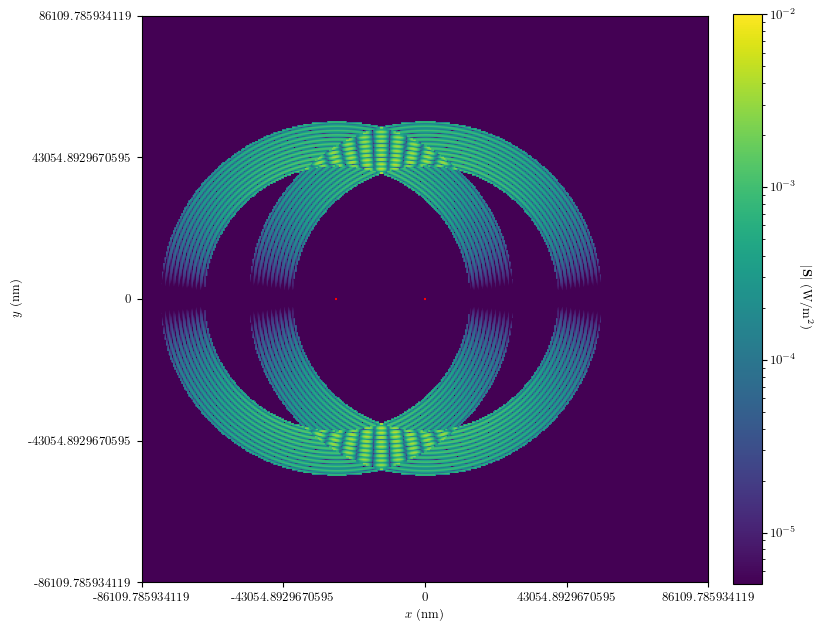

In [191]:
plot_S(S)

In [192]:
Slist=[]

tlist = t+np.linspace(0, np.pi/omega, 11)

for t in tqdm(tlist):
    S = calculate_S(t,x,y,z)
    Slist.append(S)

Slist=np.array(Slist)

  0%|                                                                                                                                             | 0/11 [00:00<?, ?it/s]/home/subasi/micromamba/envs/atomicchain/lib/python3.12/site-packages/pycharge/simulation.py:148: RuntimeWarning: some failed to converge after 50 iterations
  tr = optimize.newton(charge.solve_time, initial_guess,
/home/subasi/micromamba/envs/atomicchain/lib/python3.12/site-packages/pycharge/simulation.py:190: RuntimeWarning: some failed to converge after 50 iterations
  tr = optimize.newton(charge.solve_time, initial_guess,
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:16<00:00,  1.47s/it]


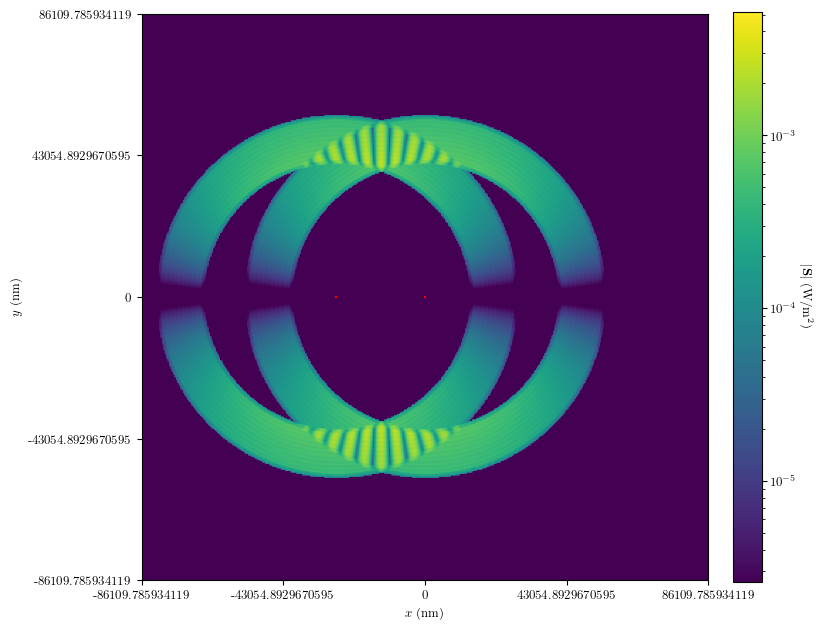

In [193]:
plot_S(np.average(Slist,axis=0))

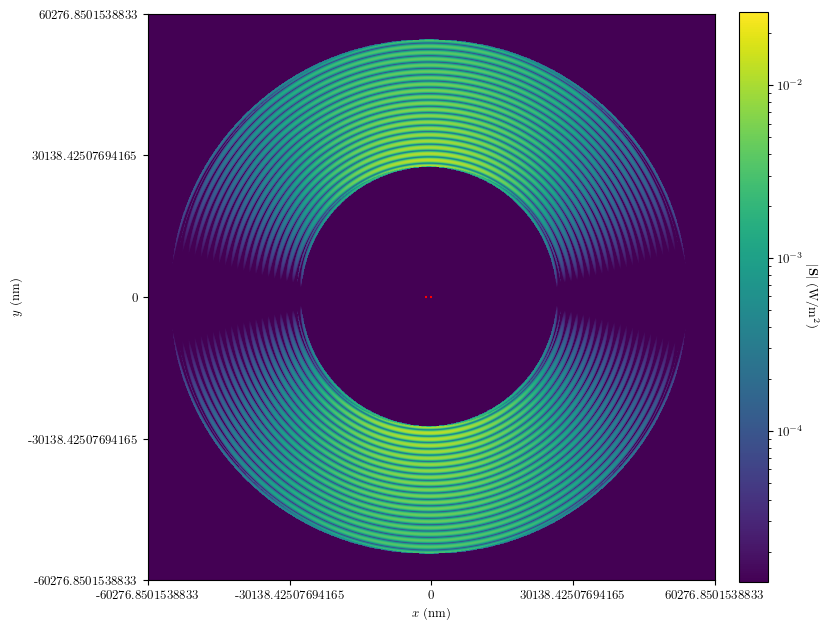

In [158]:
plot_S(Slist[3])